In [2]:
# from sklearn.cross_validation import train_test_split

In [107]:
# Import libraries
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import tree
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [108]:
# Ignore warnings
warnings.filterwarnings('ignore')

In [109]:
# Set seed for reproducibility
SEED = 0

In [110]:
df = pd.read_csv('donors_in_campaign_6169.csv')
df.head()

,Unnamed: 0,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,0,100001,1861.0,F,NL,1967.0,52.0,178.49,50273.0,12.0,1,14.874167,genX,1
1,1,100002,2260.0,M,NL,1952.0,68.0,20.00,2071.0,1.0,1,20.000000,Boomer,1
2,2,100004,1020.0,F,FR,1952.0,68.0,716.22,118787.0,26.0,1,27.546923,Boomer,1
3,3,100008,1780.0,M,FR,1937.0,83.0,124.37,12760.0,3.0,1,41.456667,Boomer,1
4,4,100009,1020.0,M,FR,1932.0,88.0,326.78,77210.0,19.0,1,17.198947,Boomer,1


In [111]:
df_7244 = pd.read_csv('donors_in_campaign_7244.csv')
df_7244.head()

,Unnamed: 0,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,0,100001,1861.0,F,NL,1967.0,52.0,178.49,50273.0,12.0,1,14.874167,genX,1
1,1,100002,2260.0,M,NL,1952.0,68.0,20.00,2071.0,1.0,1,20.000000,Boomer,1
2,2,100008,1780.0,M,FR,1937.0,83.0,124.37,12760.0,3.0,1,41.456667,Boomer,1
3,3,100009,1020.0,M,FR,1932.0,88.0,326.78,77210.0,19.0,1,17.198947,Boomer,1
4,4,100010,1020.0,M,FR,1983.0,37.0,40.00,2068.0,1.0,1,40.000000,genY,1


In [143]:
df_7662 = pd.read_csv('donors_in_campaign_7662.csv')
df_7662.head(20)

,Unnamed: 0,donorID,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,avg_amount_class,generation
0,0,134242,3580.0,M,NL,1966.0,53.0,30.000,5588.0,2.0,1,15.000000,1,genX
1,1,126503,4250.0,M,FR,1949.0,70.0,50.000,2087.0,1.0,1,50.000000,1,Boomer
2,2,104392,4820.0,F,FR,1974.0,46.0,50.000,2086.0,1.0,1,50.000000,1,genX
3,3,105905,8370.0,M,NL,1970.0,49.0,210.000,2133.0,3.0,1,70.000000,1,genX
4,4,120506,8020.0,M,NL,1973.0,46.0,61.890,18694.0,5.0,1,12.378000,1,genX
5,5,128540,2800.0,F,NL,1990.0,30.0,175.000,13049.0,5.0,1,35.000000,1,genY
6,6,126159,1500.0,M,NL,1946.0,74.0,199.250,21125.0,6.0,1,33.208333,1,Boomer
7,7,141462,8310.0,F,NL,1955.0,65.0,20.000,4069.0,2.0,1,10.000000,0,Boomer
8,8,140682,8580.0,F,NL,1949.0,70.0,60.000,2815.0,2.0,1,30.000000,1,Boomer
9,9,133551,2110.0,F,NL,1949.0,70.0,10.000,3192.0,1.0,0,10.000000,0,Boomer


In [51]:
# df = pd.read_csv('df_donors_table1.csv')
# df.head()

In [148]:
display(df.shape)
display(df_7244.shape)
df_7662.shape

(34846, 5)

(25631, 12)

(26493, 5)

In [114]:
df.drop(['Unnamed: 0', 'donorID', 'language', 'zipcode', 'gender', 'year', 'amount', 'amount_class', 'avg_amount'], axis=1, inplace=True)
df.head()

,age,recency,freq,generation,avg_amount_class
0,52.0,50273.0,12.0,genX,1
1,68.0,2071.0,1.0,Boomer,1
2,68.0,118787.0,26.0,Boomer,1
3,83.0,12760.0,3.0,Boomer,1
4,88.0,77210.0,19.0,Boomer,1


In [115]:
df_7244.drop(['Unnamed: 0', 'donorID'], axis=1, inplace=True)
df_7244.head()

,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,1861.0,F,NL,1967.0,52.0,178.49,50273.0,12.0,1,14.874167,genX,1
1,2260.0,M,NL,1952.0,68.0,20.00,2071.0,1.0,1,20.000000,Boomer,1
2,1780.0,M,FR,1937.0,83.0,124.37,12760.0,3.0,1,41.456667,Boomer,1
3,1020.0,M,FR,1932.0,88.0,326.78,77210.0,19.0,1,17.198947,Boomer,1
4,1020.0,M,FR,1983.0,37.0,40.00,2068.0,1.0,1,40.000000,genY,1


In [147]:
df_7662.drop(['Unnamed: 0', 'donorID', 'language', 'zipcode', 'gender', 'year', 'amount', 'amount_class', 'avg_amount'], axis=1, inplace=True)
df_7662.head()

,age,recency,freq,avg_amount_class,generation
0,29,2888,1,1,1
1,46,431,0,1,0
2,22,430,0,1,1
3,25,457,2,1,1
4,22,8436,4,1,1


In [118]:
# Declare feature vector and target variable
Xi = df.drop(['avg_amount_class'], axis = 1)
y = df['avg_amount_class']

print ("Features: ",Xi.columns)
print('Target:\n', y.value_counts())

Features:  Index(['age', 'recency', 'freq', 'generation'], dtype='object')
Target:
 1    28026
0     6820
Name: avg_amount_class, dtype: int64


In [119]:
# Declare feature vector and target variable
Xi_7244 = df_7244.drop(['avg_amount_class'], axis = 1)
y_7244 = df_7244['avg_amount_class']

print ("Features: ",Xi_7244.columns)
print('Target:\n', y_7244.value_counts())

Features:  Index(['zipcode', 'gender', 'language', 'year', 'age', 'amount', 'recency',
       'freq', 'amount_class', 'avg_amount', 'generation'],
      dtype='object')
Target:
 1    19922
0     5709
Name: avg_amount_class, dtype: int64


In [149]:
# Declare feature vector and target variable
Xi_7662 = df_7662.drop(['avg_amount_class'], axis = 1)
y_7662 = df_7662['avg_amount_class']

print ("Features: ",Xi_7662.columns)
print('Target:\n', y_7662.value_counts())

Features:  Index(['age', 'recency', 'freq', 'generation'], dtype='object')
Target:
 1    21042
0     5451
Name: avg_amount_class, dtype: int64


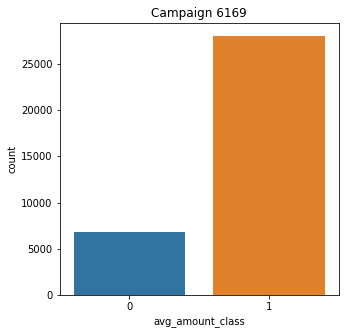

In [121]:
# TRAIN
plt.figure(figsize=(5, 5))
s = sns.countplot(x = "avg_amount_class", data = df)
plt.title('Campaign 6169')
plt.show()

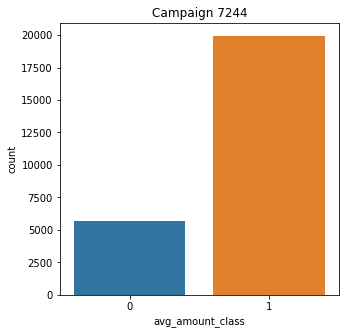

In [122]:
# TEST
plt.figure(figsize=(5, 5))
s = sns.countplot(x = "avg_amount_class", data = df_7244)
plt.title('Campaign 7244')
plt.show()

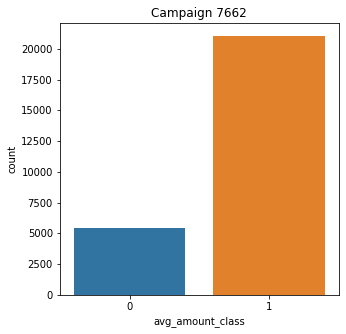

In [150]:
# TEST
plt.figure(figsize=(5, 5))
s = sns.countplot(x = "avg_amount_class", data = df_7662)
plt.title('Campaign 7662')
plt.show()

In [124]:
# Perform label encoding on the TRAIN data
for col in df.columns:
    df[col] = LabelEncoder().fit_transform(df[col])
 
df.head()

,age,recency,freq,generation,avg_amount_class
0,28,14468,11,1,1
1,44,249,0,0,1
2,44,16319,25,0,1
3,59,7094,2,0,1
4,64,15732,18,0,1


In [125]:
# Perform label encoding on the TEST data
for col in df_7244.columns:
    df_7244[col] = LabelEncoder().fit_transform(df_7244[col])
 
df_7244.head()

,zipcode,gender,language,year,age,amount,recency,freq,amount_class,avg_amount,generation,avg_amount_class
0,112,0,2,49,28,2430,11447,11,1,1505,1,1
1,149,1,2,34,44,114,326,0,1,2063,0,1
2,99,1,1,19,59,1732,5879,2,1,5474,0,1
3,1,1,1,14,64,3838,12418,18,1,1764,0,1
4,1,1,1,65,13,363,323,0,1,5386,2,1


In [151]:
# Perform label encoding on the TEST data
for col in df_7662.columns:
    df_7662[col] = LabelEncoder().fit_transform(df_7662[col])
 
df_7662.head()

,age,recency,freq,avg_amount_class,generation
0,29,2888,1,1,1
1,46,431,0,1,0
2,22,430,0,1,1
3,25,457,2,1,1
4,22,8436,4,1,1


In [127]:
# Declare feature vector and target variable
X = df.drop(['avg_amount_class'], axis = 1)
y = df['avg_amount_class']

In [128]:
# Declare feature vector and target variable
X_7244 = df_7244.drop(['avg_amount_class'], axis = 1)
y_7244 = df_7244['avg_amount_class']

In [152]:
# Declare feature vector and target variable
X_7662 = df_7662.drop(['avg_amount_class'], axis = 1)
y_7662 = df_7662['avg_amount_class']

In [130]:
X.isnull().sum()

age           0
recency       0
freq          0
generation    0
dtype: int64

In [131]:
# Encode categorical variables
# Normalize feature vector
# Scale the data to be between -1 and 1

X_d = pd.get_dummies(X)
X_7244_d = pd.get_dummies(X_7244)

y = LabelEncoder().fit_transform(y)
y_7244 = LabelEncoder().fit_transform(y_7244)


X= StandardScaler().fit_transform(X)
X_7244 = StandardScaler().fit_transform(X_7244)

In [153]:
X_7662_d = pd.get_dummies(X_7662)

y_7662 = LabelEncoder().fit_transform(y_7662)

X_7662 = StandardScaler().fit_transform(X_7662)

# Principal Component Analysis PCA

### TRAIN

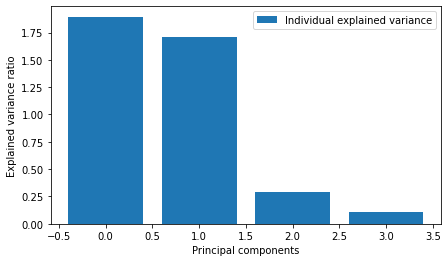

array([[ 0.06289819,  2.108964  ],
       [ 1.57733901, -1.10402296],
       [ 1.73008239,  3.73672462],
       ...,
       [ 0.03624111, -0.25742784],
       [-0.38804926, -1.04072184],
       [-1.77633585, -1.02584933]])

In [133]:
# Import PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X)

# View explained_variance
explained_variance = pca.explained_variance_

# Visualize explained_variance
plt.figure(figsize=(7, 4))
plt.bar(range(Xi.shape[1]), explained_variance, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# The last 2 components has less amount of variance of the data.The 1st 2sd components retains more than 90% of the data.
# Perform PCA by taking 2 components with maximum Variance
pca = PCA(n_components=2)
pca.fit_transform(X)

### TEST

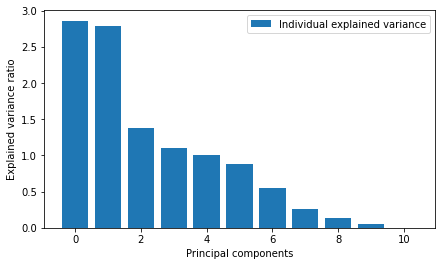

array([[ 0.2280869 ,  2.02230373,  1.23784601,  0.93734696,  1.18363888,
        -0.94650047],
       [ 1.86748667, -1.2499221 , -0.33183319,  0.37479833, -0.88459321,
        -1.02098544],
       [ 3.05858139,  0.1645927 , -1.38613503,  2.97005989, -0.83406956,
         1.59304278],
       ...,
       [ 1.00126992, -0.59345345, -1.76565421,  0.34451201,  1.1865523 ,
        -0.90960398],
       [-0.62528362, -1.04915182, -1.84522812,  2.73683777, -0.81387134,
         1.5539625 ],
       [-2.15635864, -1.00442444, -1.85263015,  2.96936242, -0.80681047,
         1.33189314]])

In [68]:
# Import PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(X_7244)

# View explained_variance
explained_variance = pca.explained_variance_

# Visualize explained_variance
plt.figure(figsize=(7, 4))
plt.bar(range(Xi_7244.shape[1]), explained_variance, label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

# The last 3 components has less amount of variance of the data.The 1st 6 components retains more than 90% of the data.
# Perform PCA by taking 6 components with maximum Variance
pca = PCA(n_components=6)
pca.fit_transform(X_7244)

# Random Forest

recency       0.680432
age           0.240963
freq          0.067155
generation    0.011450
dtype: float64


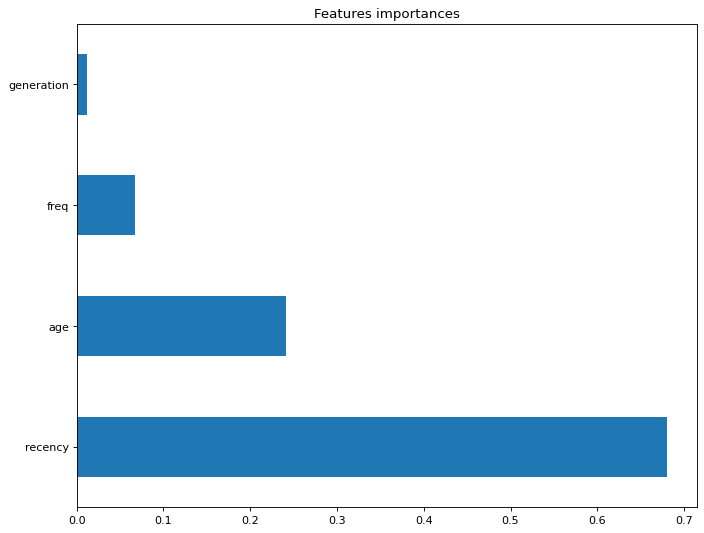


 Model accuracy score with 1000 decision-trees : 0.756

Area Under the Receiver Operating Characteristic Curve (ROC AUC) : 0.551

 Confusion matrix

 [[ 441 1665]
 [ 890 7458]]


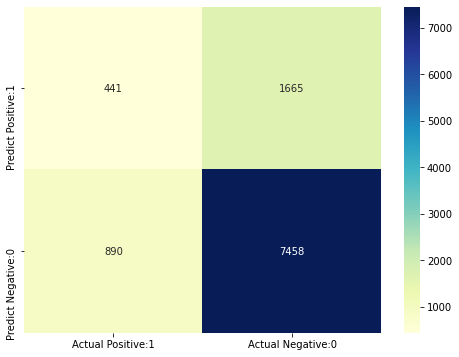



 Classification Report

               precision    recall  f1-score   support

           0       0.33      0.21      0.26      2106
           1       0.82      0.89      0.85      8348

    accuracy                           0.76     10454
   macro avg       0.57      0.55      0.56     10454
weighted avg       0.72      0.76      0.73     10454



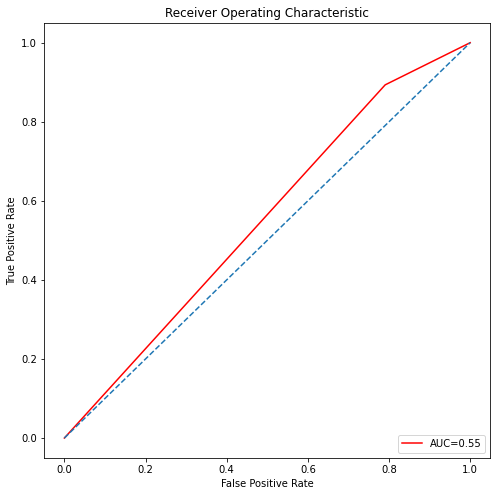

In [163]:
# Import Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Split the dataset 70% training set & 30% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

# Instantiate the classifier with n_estimators = 100
RF = RandomForestClassifier(n_estimators=1000, random_state=0, class_weight='balanced')

# Fit the classifier to the training set
RF.fit(X_train, y_train)

# Predict on the test set
y_pred = RF.predict(X_test)

# View the feature scores
feature_scores = pd.Series(RF.feature_importances_, index=X_d.columns).sort_values(ascending=False)
print(feature_scores)

# Visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(RF.feature_importances_, index= X_d.columns)

feat_importances.nlargest(10).plot(kind='barh')
plt.title('Features importances')
plt.show()

# Check accuracy score 
ac_rf = accuracy_score(y_test, y_pred)
print('\n Model accuracy score with 1000 decision-trees : {0:0.3f}'. format(ac_rf))
# acc_score.append(ac)

# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
roc_ac = roc_auc_score(y_test, y_pred)
print('\nArea Under the Receiver Operating Characteristic Curve (ROC AUC) : {0:0.3f}'. format(roc_ac))

# Model Evaluation using Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('\n Confusion matrix\n\n', cm)

# Visualize Confusion Matrix using Heatmap
plt.figure(figsize=(8, 6))
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
# Classification report
print('\n\n Classification Report\n\n',classification_report(y_test, y_pred))

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test,  y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr,tpr,label = "AUC=%0.2f" %roc_ac, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [135]:
bas = metrics.balanced_accuracy_score(y_test, y_pred)
bas

0.5476450905096488

In [136]:
import pickle
import os 

# Save the model to disk
directory = "./models/"
name = 'donation_r_f.pkl'
path = os.path.join(directory, name)

pickle.dump(RF, open(path, 'wb'))

print('Saved trained model at %s ' % path)

Saved trained model at ./models/donation_r_f.pkl 


In [154]:
# Load the model
model = pickle.load(open(path, 'rb'))

In [155]:
y_pred_7662 = model.predict(X_7662)

In [178]:
# df_7662['prediction'] = pd.DataFrame(data=y_pred_7662, columns=['prediction'])

In [180]:
# df_7662.loc[df_7662['prediction'] == 0].count()

In [175]:
correct_predictions = np.nonzero(y_pred_7662 == 1)[0]
incorrect_predictions = np.nonzero(y_pred_7662 != 1)[0]

print(len(correct_predictions)," classified correctly")
print(len(incorrect_predictions)," classified incorrectly")

23673  classified correctly
2820  classified incorrectly


In [177]:
y_pred_7662.shape

(26493,)

In [156]:
prediction = model.score(X_7662, y_7662)

In [157]:
recall = metrics.recall_score(y_7662, y_pred_7662)

In [158]:
bas = metrics.balanced_accuracy_score(y_7662, y_pred_7662)
print('bas:', bas)

bas: 0.5272296040045077


In [159]:
print('recall:', recall)

recall: 0.9047619047619048


In [160]:
print('prediction:',prediction)

prediction: 0.749405503340505


# Logistic Regression

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()
reg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_reg = round(reg.score(X_train, Y_train) * 100, 2)
print(acc_reg)

# SVM

In [ ]:
# Linear Support Vector Machine

from sklearn.svm import SVC, LinearSVC

svc = LinearSVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(acc_svc)

# Best Model

In [ ]:
# BEST MODEL

results = pd.DataFrame({
    'Model': ["Random_Forst","Logistic_Regression","Support_Vector_Machine"],
    'Score': [acc_random_forest,acc_reg,acc_svc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)